# TensorFlow Basics

### 1. Tensors
- TensorFlow operates on multidimensional arrays called tensors which as represented by tf.Tensor objects
- Tensors are data that flows between layers

In [151]:
import tensorflow as tf
import os

In [152]:
x = tf.constant([[1. ,2. , 3.] ,
                 [4. ,5. ,6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


The Most important attributes of a tf.Tensor object are

1. **Tensor.shape:** tells the size of the tensor along each axis
2. **Tensor.dtype:** tells you the type of the elements present in the tensor

TensorFlow implements basic mathematical operations as well as specialized operations on the Tensors

In [153]:
print(x+x)
print(type(x+x))
print(type((x + x ).numpy())) # converting Tensor into array

tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


In [154]:
x @ tf.transpose(x) # @ = matrix multiplication

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

**NOTE** : 
- *axis = 0* refers to rows and action takes place in vertical direction 
- *axis = 1* refers to columns and action takes place in the horizontal direction 

 This is for a 2D Tensor = 2D array

In [155]:
tf.concat([x , x , x] , axis = 0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [156]:
tf.concat([x , x ,x] , axis = 1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [157]:
tf.nn.softmax(x , axis = -1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [158]:
print(x)
print(tf.reduce_sum(x))
print(tf.reduce_sum(x , axis = 0))
print(tf.reduce_sum(x , axis = 1))

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
tf.Tensor(21.0, shape=(), dtype=float32)
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
tf.Tensor([ 6. 15.], shape=(2,), dtype=float32)


**NOTE:** TensorFlow function expects a Tensor as an input , the function will also accept anything that can be converted to a Tensor using tf.convert_to_tensor.

In [159]:
tf.convert_to_tensor([1 , 2 ,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

#### 2. GPU acceleration 
- Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

In [160]:
device = tf.config.list_physical_devices('GPU')

if device: 
 print("TensorFlow **IS** using the GPU")
 for devices in device:
  print(devices)

else:
 print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


### 3. Variables
- Normal tf.Tensor objects are immutable : not changable
- To store the model weights in tensorFlow we need to use Variables that are represented by tf.Variable

In [161]:
var = tf.Variable([0.0 , 0.0 , 0.0])

In [162]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [163]:
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [164]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [165]:
var.assign_add([1 , 2 , 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [166]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

### 4. Automatic Differentiation
- In machine learing the train the model we need to optimze the loss of the model by performing gradient descent where we calculate the gradient of the loss wrt to the parameters and then update the parameter values
- instead of calculating the gradient of a function manually tensorflow allows us to calculate the gradient of a function using a concept called **autodiff**

In [167]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5 

  return y

In [168]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

   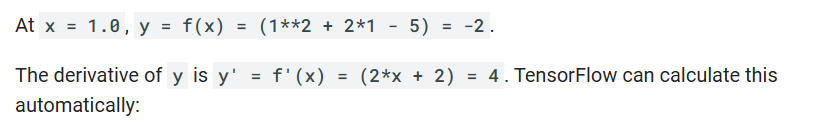

In [169]:
# implementing autodiff

with tf.GradientTape() as tape:

  y = f(x)

g_x = tape.gradient(y , x )

In [170]:
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

### 5. Graphs and Functions
- The concept of Graphs and Functions are used for two things 
   - Performance Optimization : Speeding up Training
   - Exporting : We can save the models when its done training

- For this a decorator **@tf.function** is used to convert normal Python function into TensorFlow graphs
- There are two forms of execution in Tensorflow
   - By Eager Execution 
   - By Graph Execution 
- In Eager Execution, the function or the line of code runs when it is called or encoutered
- *In Graph Execution, Tf compiles the function into a computational graph, which means that the first time you run the function , Tf traces the operation present within the function and builds a graph and optimizes performance for subsquent calls as in subsequent calls the same old graph created is used and only pure-TensorFlow code is run and Python codes are ignored which reduces the execution load*
- In Eager execution for each instance the entire function is run along with python codes which makes it slower than graph execution

**Advantages**
1. In many cases they provide a significant speedup in execution
2. You can export these graphs, using tf.saved_model, to run on other systems like a server or a mobile device, no Python installation required.

In [171]:
@tf.function
def my_func(x):
 print("Tracing.\n")
 return tf.reduce_sum(x)

The first time you run the tf.function, although it executes in Python, it captures a complete, optimized graph representing the TensorFlow computations done within the function.

In [172]:
x = tf.constant([1,2,3])

my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. Below, note that my_func doesn't print tracing since print is a Python function, not a TensorFlow function

In [173]:
x = tf.constant([4,5,6])

my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=15>

A graph may not be reusable for inputs with a different signature (shape and dtype), so a new graph is generated instead:(i.e. python codes will be again read to create new graph so Tracing will be printed)

In [174]:
x = tf.constant([1., 2. , 3.])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

### 6.Modules , Layers and models

- tf.Module is a class that is used for managing the tf.Variable and tf.function objects to be used in your model
- It serves as a method to encapsulate and manage the parameters and the computations that involve the parameters 
- For Eg: Initializing the weights , calculating the gradients and updating the parameters

**Significant Features**
1. You can *save* and *restore* the values of your *variables* using **tf.train.Checkpoint**. This is useful during training as it is quick to save and restore a model's state.

2. You can import and export the tf.Variable values and the tf.function graphs using **tf.saved_model**. This allows you to run your model independently of the Python program that created it.


**METHOD RESOLUTION ORDER (MRO)**
- Determines the order in which the classes are searched when looking for a method
- Order is determined in the way the order in which the child inherits the parent classes

Here C ( A , B) , so MRO = C -> A -> B

In [175]:
class A:

 def greet(self):
  print('Hello A')

class B:
 def greet(self):
   print ('Hello B')

class C(A , B):
 def greet(self):
  super(C,self).greet()

 

In [176]:
c_inst = C()
c_inst.greet()

Hello A


Here C ( B , A) , so MRO = C -> B -> A

In [177]:
class A:

 def greet(self):
  print('Hello A')

class B:
 def greet(self):
   print ('Hello B')

class C(B , A):
 def greet(self):
  super(C,self).greet()

 

In [178]:
c_inst = C()
c_inst.greet()

Hello B


In [179]:
class MyModule(tf.Module):

  def __init__(self , value):
    super(MyModule , self).__init__()
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self , x):
    return x * self.weight

In [180]:
mod_inst = MyModule(3)
mod_inst.multiply(tf.constant([1,2,3]))


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [181]:
mod_inst1 = MyModule(5)
mod_inst1.multiply(tf.constant([[2,2],[3,3]]))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [15, 15]])>

Save the module

In [182]:
save_path = './saved/mod_inst/'
tf.saved_model.save(mod_inst , save_path)

INFO:tensorflow:Assets written to: ./saved/mod_inst/assets


INFO:tensorflow:Assets written to: ./saved/mod_inst/assets


In [183]:
save_path1 = './saved/mod_inst1/'
tf.saved_model.save(mod_inst1 , save_path)

INFO:tensorflow:Assets written to: ./saved/mod_inst/assets


INFO:tensorflow:Assets written to: ./saved/mod_inst/assets


Loading the module

In [184]:
loaded_mod = tf.saved_model.load(save_path)

print(loaded_mod.signatures)

loaded_mod.multiply(tf.constant([[4,4],[5,5]]))

_SignatureMap({})


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 20],
       [25, 25]])>

In [185]:
loaded_mod1 = tf.saved_model.load(save_path1)

loaded_mod1.multiply([[4,4],[5,5]])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 20],
       [25, 25]])>

**NOTE:** *tf.keras.layers.Layer* and *tf.keras.Model* builds upon the functionality of tf.Module meaning that they are able to inherit from *tf.Module*

### 7. Training Loops
- Building a basic model and training it from scratch

In [186]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = [9,6]

In [187]:
np.random.seed(42)


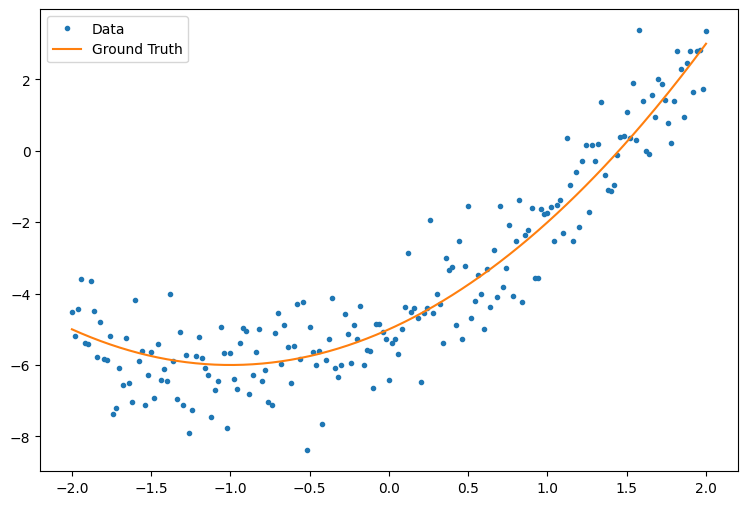

In [188]:
x  = tf.linspace(-2,2,201)
x = tf.cast(x , tf.float32)

def quad_func(x):
  y = x**2 + 2*x -5 
  return y

y = quad_func(x) + np.random.randn(201)

plt.plot(x.numpy() , y.numpy() ,'.' , label = 'Data')
plt.plot(x , f(x) , label ='Ground Truth')
plt.legend()

Creating a quadratic model with randomly initialized weights and bias

In [189]:
class Model(tf.Module):

  def __init__(self):
    super(Model , self).__init__()

    #Randomly generating weight and bias parameters

    rand_int = tf.random.uniform(shape = [3] , minval= 0. , maxval= 5. , seed = 22)

    self.w_q  = tf.Variable(rand_int[0])
    self.w_l = tf.Variable(rand_int[1])
    self.b = tf.Variable(rand_int[2])

  @tf.function
  def __call__ (self , x):
     return self.w_q * (x**2) + self.w_l * x + self.b

In [190]:
# Observing the model's Performance before training

quad_model = Model()

In [191]:
def plot_preds( x , y , f , model , title):
  
  plt.figure()
  plt.plot(x , y , '.' , label ='Data')
  plt.plot(x , f(x) , label ='Ground Truth')
  plt.plot( x , model(x) , label ='Predictions')
  plt.title(title)
  plt.legend()

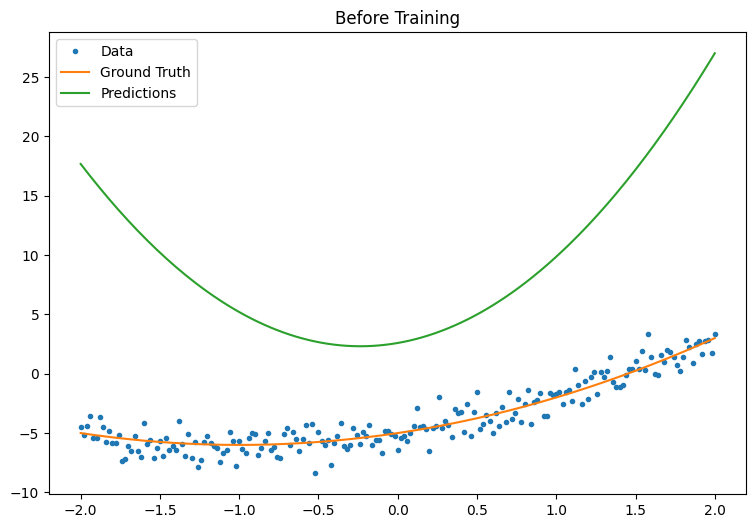

In [192]:
plot_preds(x , y , quad_func , quad_model , 'Before Training' )

Defining the loss function

In [193]:
def mse_loss(y_pred , y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [194]:
x.shape

TensorShape([201])

Creating a loop to minimize loss function and update parameters

In [195]:
#Creating a Dataset

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

In [196]:
quad_model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5921345>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.3315172>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.938236>)

In [197]:
with tf.GradientTape() as tape: 
      
  batch_loss = mse_loss(quad_model(x) , y)
   
grads = tape.gradient(batch_loss , quad_model.variables)

In [198]:
for g , v in zip(grads , quad_model.variables):
 print( g , v)

tf.Tensor(25.868828, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5921345>
tf.Tensor(0.73294973, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.3315172>
tf.Tensor(46.305218, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.938236>


MSE for step 100: 68.45970153808594
MSE for step 100: 4.137494087219238
MSE for step 100: 2.0160980224609375
MSE for step 100: 1.2659902572631836
MSE for step 100: 1.00144624710083
MSE for step 100: 0.9049763083457947
MSE for step 100: 0.8743342161178589
MSE for step 100: 0.860668420791626
MSE for step 100: 0.8555720448493958
MSE for step 100: 0.8558637499809265


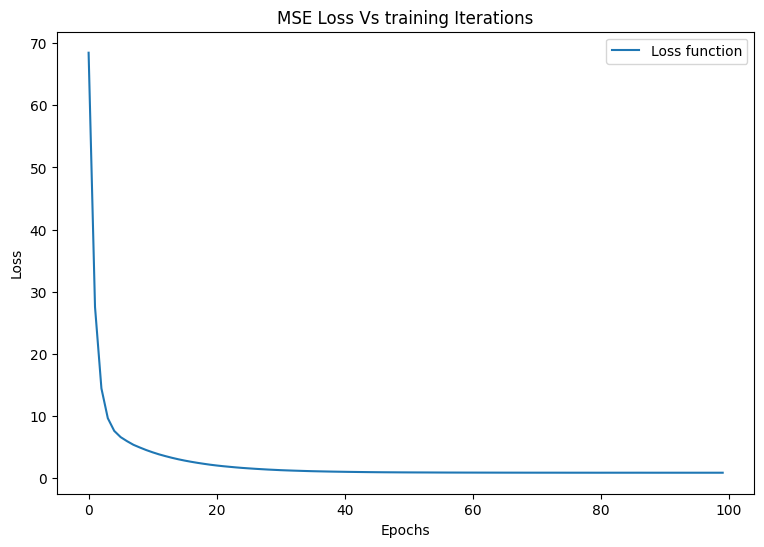

In [199]:
#Setting up the training parameters 

epochs = 100
leaarning_rate = 0.01
losses = []

for epoch in range(epochs):
 
 for x_batch , y_batch in dataset:
   
   with tf.GradientTape() as tape: 
      
     batch_loss = mse_loss(quad_model(x_batch) , y_batch)
   
   grads = tape.gradient(batch_loss , quad_model.variables)

   for g , v in zip(grads , quad_model.variables):
     
     #Updating each weight parameter
     v.assign_sub(leaarning_rate * g)
 
 # Keeping track of loss

 loss = mse_loss(quad_model(x) , y)
 losses.append(loss)

 if epoch % 10 == 0:
   print(f"MSE for step {epochs}: {loss.numpy()}")
 
# plotting the loss throughout the training process

plt.figure()
plt.plot(range(epochs) , losses , label = 'Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Loss Vs training Iterations')
plt.legend()

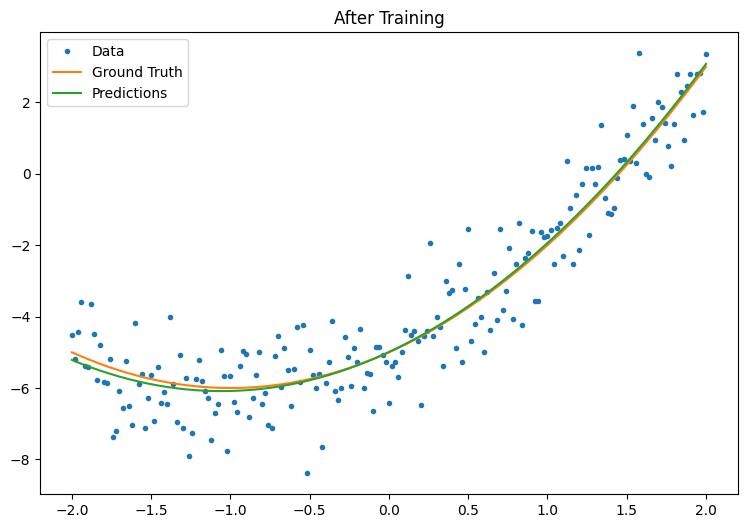

In [200]:
plot_preds( x , y , quad_func , quad_model , "After Training")

In [204]:
x =  -0.5
y = quad_func(x)
y_pred = quad_model(x).numpy()

print(y , y_pred)

-5.75 -5.7830725
